<a href="https://colab.research.google.com/github/treezy254/Feature-Engineering/blob/master/creating_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

accidents = pd.read_csv('accidents.csv')
autos = pd.read_csv('autos.csv')
concrete = pd.read_csv('concrete.csv')
customers = pd.read_csv('customer.csv')



<ipython-input-4-50b614059b98>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")
<ipython-input-4-50b614059b98>:18: DtypeWarning: Columns (17,18,19,20,21,22,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents = pd.read_csv('accidents.csv')


In [ ]:
autos['stroke_ratio'] = autos.stroke / autos.bore
autos[['stroke', 'bore', 'stroke_ratio']].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


## Mathematical Transforms

In [ ]:
autos['displacement'] = (
    np.pi * ((0.5 * autos.bore ) ** 2) * autos.stroke * autos.num_of_cylinders
)

<ipython-input-8-340ab9b7fbed>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
<ipython-input-8-340ab9b7fbed>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1])


<Axes: xlabel='LogWindSpeed', ylabel='Density'>

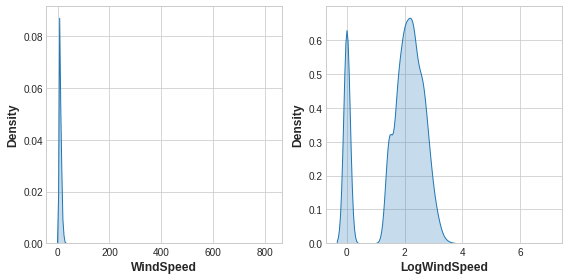

In [ ]:
# if features has 0.0 displacement, use np.log1p (log(1+x)) instead of np.log
accidents['LogWindSpeed'] = accidents.WindSpeed.apply(np.log1p)

# Plot comparison
fig,axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1])

## Counts

In [ ]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]
accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

accidents[roadway_features + ["RoadwayFeatures"]].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0.0
1,False,False,False,False,False,False,False,False,False,False,False,False,0.0
2,False,False,False,False,False,False,False,False,False,False,False,False,0.0
3,False,False,False,False,False,False,False,False,False,False,False,False,0.0
4,False,False,False,False,False,False,False,False,False,False,False,False,0.0
5,False,False,False,False,True,False,False,False,False,False,False,False,1.0
6,False,False,False,False,False,False,False,False,False,False,False,False,0.0
7,False,False,True,False,False,False,False,False,False,False,False,True,2.0
8,False,False,True,False,False,False,False,False,False,False,False,True,2.0
9,False,False,False,False,False,False,False,False,False,False,False,False,0.0


In [ ]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete["Components"] = concrete[components].gt(0).sum(axis=1)

concrete[components + ["Components"]].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


## Building-Up and Breaking-Down Features

In [ ]:
customers[['Type', 'Level']] = (
    customers['Policy']
    .str
    .split(" ", expand=True)
)

customers[['Policy', 'Type', 'Level']].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


In [ ]:
autos['make_and_style'] = autos["make"] + "_" + autos['body_style']
autos[['make', 'body_style', 'make_and_style']].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


## Group Transforms

In [ ]:
customers["AverageIncome"] = (
    customers.groupby("State")
    ['Income']
    .transform("mean")
)

customers [['State', 'Income', 'AverageIncome']].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


In [ ]:
customers["StateFreq"] = (
    customers.groupby("State")
    ["State"]
    .transform("count")
    / customers.State.count()
)

customers[["State", "StateFreq"]].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


In [ ]:
# Create splits
df_train = customers.sample(frac=0.5)
df_valid = customers.drop(df_train.index)

# Create the average claim amount by coverage type, on the training set
df_train["AverageClaim"] = df_train.groupby("Coverage")["ClaimAmount"].transform("mean")

# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)

df_valid[["Coverage", "AverageClaim"]].head(10)


,Coverage,AverageClaim
0,Premium,660.953679
1,Basic,377.474754
2,Extended,479.343538
3,Basic,377.474754
4,Premium,660.953679
5,Basic,377.474754
6,Basic,377.474754
7,Basic,377.474754
8,Basic,377.474754
9,Basic,377.474754
